# Step1: Import Libraries & Data
1. Import libararies required. <br>
2. Take a look at the dataset. How many observations are included? Is there any missing values? <br>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
#Load the dataset into dataframe
data = pd.read_csv('historical_data.csv')
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,duration,campaign,pdays,previous,poutcome,y
0,41,management,married,tertiary,no,0,no,no,cellular,3,858,1,-1,0,unknown,no
1,36,blue-collar,married,primary,no,156,yes,no,cellular,21,219,2,-1,0,unknown,no
2,32,technician,married,secondary,no,374,no,no,cellular,6,119,6,-1,0,unknown,no
3,30,management,single,tertiary,no,3340,no,no,cellular,3,238,3,-1,0,unknown,yes
4,32,management,married,tertiary,no,141,yes,yes,cellular,22,10,13,-1,0,unknown,no


In [3]:
#Check the shape of data
print('Number of Observations:',data.shape[0])
print('Number of Features:',data.shape[1])
print('\n')
print('----------')

#Check the data types 
print('Data_types:')
print(data.dtypes)
print('\n')
print('----------')
#Check if there is missing values
print('Missing Values in each Columns:')
print(data.isna().sum())

Number of Observations: 4000
Number of Features: 16


----------
Data_types:
age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
y            object
dtype: object


----------
Missing Values in each Columns:
age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64


# <br>
# Section A: Summarization
A statistical analysis is conducted in this section.<br>
Charts and Tables are supplied to underpin the analysis.<br>
<br>
1.Table of Numeric figures in two groups (y = yes, y = no)<br>
2.Pairplots of categorical data<br>

In [4]:
# Overlook of the data distribution
data.describe()

,age,balance,day,duration,campaign,pdays,previous
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.00000,4000.000000,4000.000000
mean,40.748000,1277.040000,15.869000,290.728250,2.68525,43.125000,0.609000
std,10.916469,2532.008286,8.372477,293.223594,2.92828,103.067789,1.887196
min,18.000000,-1664.000000,1.000000,4.000000,1.00000,-1.000000,0.000000
25%,32.000000,81.750000,8.000000,108.000000,1.00000,-1.000000,0.000000
50%,39.000000,422.500000,16.000000,200.500000,2.00000,-1.000000,0.000000
75%,48.000000,1397.000000,22.000000,363.250000,3.00000,-1.000000,0.000000
max,90.000000,36252.000000,31.000000,3183.000000,51.00000,784.000000,24.000000


In [5]:
#To retain the numeric data only
n_data = data.drop(['job','marital','education','default','housing','loan','contact','poutcome'],axis = 'columns')
n_data.head()

,age,balance,day,duration,campaign,pdays,previous,y
0,41,0,3,858,1,-1,0,no
1,36,156,21,219,2,-1,0,no
2,32,374,6,119,6,-1,0,no
3,30,3340,3,238,3,-1,0,yes
4,32,141,22,10,13,-1,0,no


In [6]:
#To compare the numeric data between different group (when y = yes and y = no)
n_data.groupby('y').mean()

,age,balance,day,duration,campaign,pdays,previous
y,,,,,,,
no,40.611978,1190.291494,16.000319,222.189869,2.859828,36.640650,0.487735
yes,41.243902,1593.304297,15.390244,540.602787,2.048780,66.765389,1.051103


no     3139
yes     861
Name: y, dtype: int64

The result on previous sales was 21.525% successful out of 4000 observations


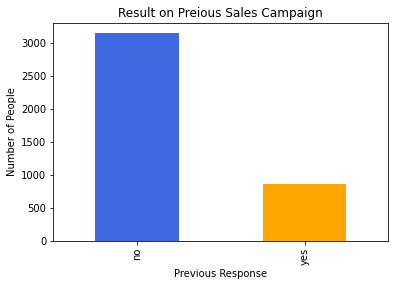

In [7]:
# To visualize the size of each group 

summary = data['y'].value_counts()
print(summary)
print("\nThe result on previous sales was {}% successful out of {} observations".format(summary[1] / len(data) * 100, len(data)))

summary.plot(kind='bar',color = ['royalblue','orange'])
plt.title('Result on Preious Sales Campaign')
plt.ylabel('Number of People')
plt.xlabel('Previous Response');

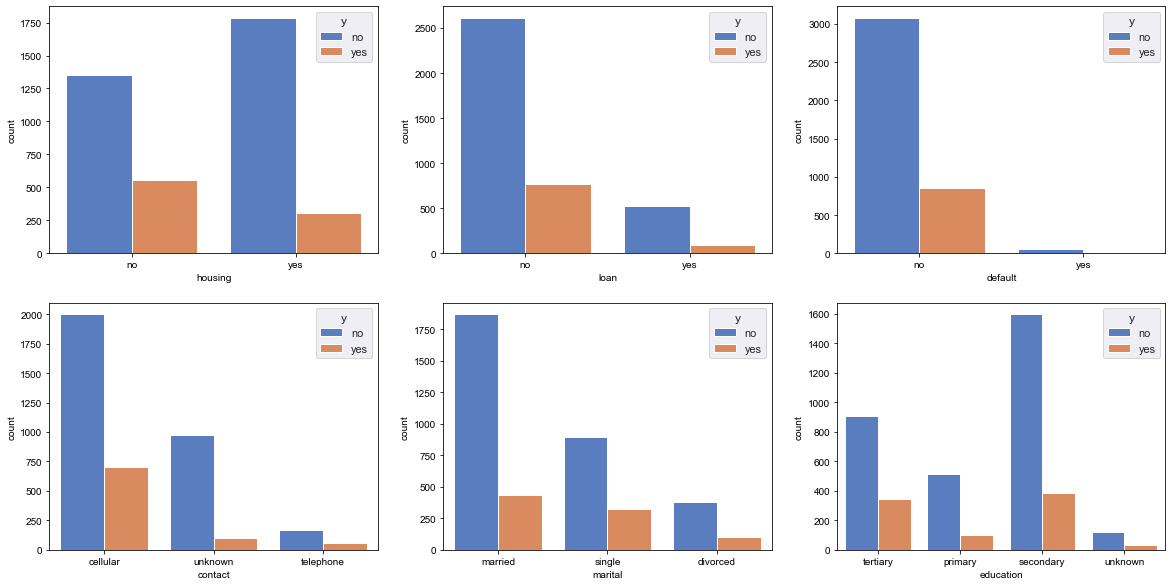

In [8]:
fig, axes = plt.subplots(2,3)
fig.set_size_inches(20,10)
sns.set_theme(style="darkgrid",palette="muted")
sns.countplot(x='housing', data=data[['y','housing']], hue='y', ax=axes[0,0])
sns.countplot(x='loan', data=data[['y','loan']], hue='y', ax=axes[0,1])
sns.countplot(x='default', data=data[['y','default']], hue='y', ax=axes[0,2])
sns.countplot(x='contact', data=data[['y','contact']], hue='y', ax=axes[1,0])
sns.countplot(x='marital', data=data[['y','marital']], hue='y', ax=axes[1,1])
sns.countplot(x='education', data=data[['y','education']], hue='y', ax=axes[1,2]);

<Figure size 1800x1152 with 0 Axes>

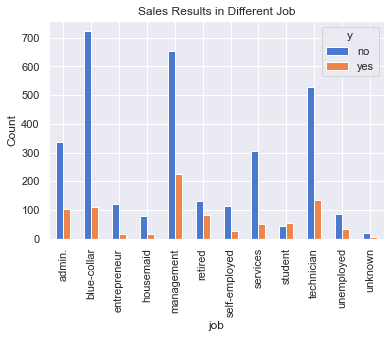

In [9]:
plt.figure(figsize = (25,16))
pd.crosstab(data.job,data.y).plot(kind = 'bar')
plt.title('Sales Results in Different Job')
plt.ylabel('Count');

<Figure size 1584x1080 with 0 Axes>

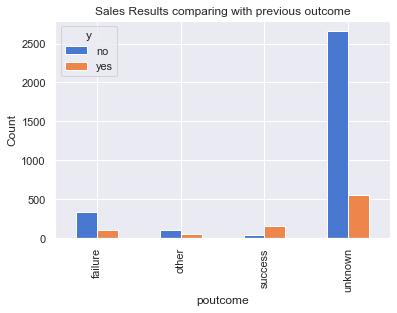

In [10]:
plt.figure(figsize = (22,15))
pd.crosstab(data.poutcome,data.y).plot(kind = 'bar')
plt.title('Sales Results comparing with previous outcome')
plt.ylabel('Count');

# <br>
# Section B: Exploration
A basic classifier called Decision Tree is first introduced in this part.<br>
In order to do so,data pre-processing is necessary.<br>
Dummy variables are employed here to convert categorical data into numeric data.<br>
<br>
With the data prepared, decision tree model is deployed.An image of the tree is also provided.<br>
<br>
Finally, feature importance is examined using 2 methods: 1.Feature Importance 2.P-value Selection.<br>
It enables us to fiter out the features with significant importance to the outcome(y).<br>
<br>


In [11]:
#Create Dummy variables for categorical data
dummies = pd.get_dummies(data=data, columns=
                         ['job', 'marital','education','default','housing','loan','contact','poutcome','y'])

dummies.drop(['age','balance','day','duration','pdays','previous','campaign','previous'],axis = 'columns',inplace = True)


#Concate dummy variables with original dataframe
new_df = pd.concat([data,dummies],axis = 'columns')
new_df


#Drop Original columns of categorical data
new_df.drop(['job','marital','education','default','housing','loan','contact','poutcome','y'],axis = 'columns',inplace = True)
new_df.head()

,age,balance,day,duration,campaign,pdays,previous,job_admin.,job_blue-collar,job_entrepreneur,...,loan_yes,contact_cellular,contact_telephone,contact_unknown,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown,y_no,y_yes
0,41,0,3,858,1,-1,0,0,0,0,...,0,1,0,0,0,0,0,1,1,0
1,36,156,21,219,2,-1,0,0,1,0,...,0,1,0,0,0,0,0,1,1,0
2,32,374,6,119,6,-1,0,0,0,0,...,0,1,0,0,0,0,0,1,1,0
3,30,3340,3,238,3,-1,0,0,0,0,...,0,1,0,0,0,0,0,1,0,1
4,32,141,22,10,13,-1,0,0,0,0,...,1,1,0,0,0,0,0,1,1,0


In [12]:
#Define output and input data
target = new_df.y_yes
inputs = new_df.drop(['y_no','y_yes'],axis = 'columns')

#Take a look at inputs data
inputs.head()

,age,balance,day,duration,campaign,pdays,previous,job_admin.,job_blue-collar,job_entrepreneur,...,housing_yes,loan_no,loan_yes,contact_cellular,contact_telephone,contact_unknown,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,41,0,3,858,1,-1,0,0,0,0,...,0,1,0,1,0,0,0,0,0,1
1,36,156,21,219,2,-1,0,0,1,0,...,1,1,0,1,0,0,0,0,0,1
2,32,374,6,119,6,-1,0,0,0,0,...,0,1,0,1,0,0,0,0,0,1
3,30,3340,3,238,3,-1,0,0,0,0,...,0,1,0,1,0,0,0,0,0,1
4,32,141,22,10,13,-1,0,0,0,0,...,1,0,1,1,0,0,0,0,0,1


In [13]:
#Introducing Decesion Tree as a basic classifier
from sklearn import tree
from sklearn.model_selection import train_test_split

#To Create model
model = tree.DecisionTreeClassifier(max_depth=5, min_samples_leaf=7)

#To Set up the train&test data
X_train,X_test,y_train,y_test = train_test_split(inputs, target, test_size=0.2, random_state=42)

In [14]:
#To train the model with training data
model.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=5, min_samples_leaf=7)

In [15]:
#To test the model with testing data
a = model.score(X_test,y_test)
print('The accuracy of the Decision Tree model is',a)

The accuracy of the Decision Tree model is 0.84375


In [16]:
#To train the model with the entire dataset
model.fit(inputs,target)

DecisionTreeClassifier(max_depth=5, min_samples_leaf=7)

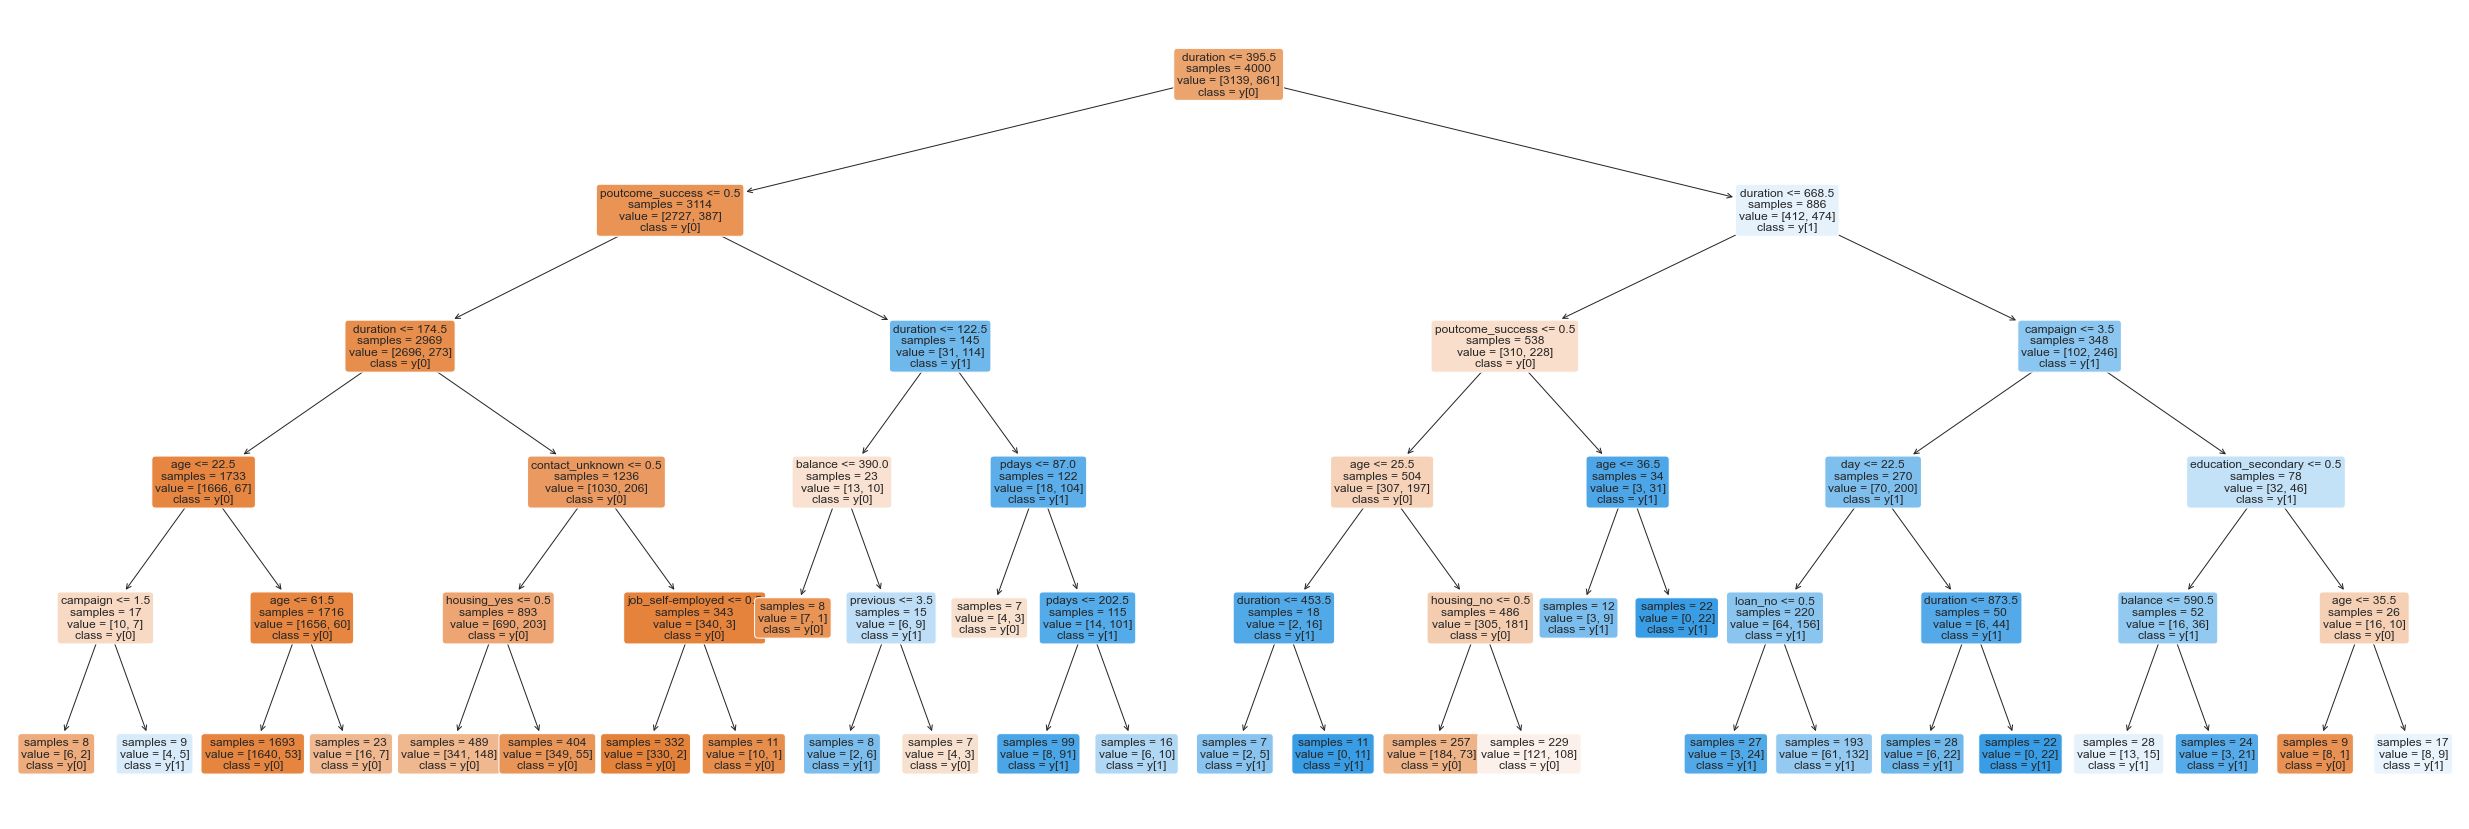

In [17]:
#To visulize the decision Tree
fig = plt.figure(figsize = (44,15))
image = tree.plot_tree(model,class_names = True,feature_names = inputs.columns,filled = True,impurity = False,rounded = True,fontsize = 12);

#To save the image 
fig.savefig("decision_tree.png")

In [18]:
#Exploring the importance of each feature in the decision tree model
#Method1: Feature_Importance 

feature_importance = pd.DataFrame({'Feature':inputs.columns,'Importance':model.feature_importances_})
feature_importance.sort_values(by='Importance',ascending = False)

,Feature,Importance
3,duration,0.556645
37,poutcome_success,0.280474
34,contact_unknown,0.044113
0,age,0.038102
29,housing_yes,0.022856
28,housing_no,0.015874
1,balance,0.009929
5,pdays,0.009413
4,campaign,0.006614
23,education_secondary,0.006114


In [19]:
#Calculating P-value of each feature

import statsmodels.api as sm
X_1 = sm.add_constant(inputs)

model = sm.OLS(target,X_1).fit()
model.pvalues

const                   2.466862e-07
age                     8.978783e-01
balance                 2.409834e-02
day                     2.770566e-01
duration               2.060479e-215
campaign                8.541589e-04
pdays                   1.262016e-01
previous                5.448306e-01
job_admin.              8.165405e-01
job_blue-collar         3.287791e-02
job_entrepreneur        5.205793e-03
job_housemaid           2.991781e-01
job_management          6.827986e-01
job_retired             1.872120e-03
job_self-employed       2.351360e-01
job_services            4.174465e-02
job_student             2.123116e-10
job_technician          9.499762e-01
job_unemployed          6.659329e-01
job_unknown             5.040827e-01
marital_divorced        2.234024e-01
marital_married         5.349653e-01
marital_single          1.860091e-05
education_primary       8.075472e-01
education_secondary     1.696257e-01
education_tertiary      3.257694e-03
education_unknown       8.505701e-01
d

In [20]:
#Using Backward Elimination to present impacful features
cols = list(inputs.columns)
pmax = 1
while (len(cols)>0):
    p= []
    X_1 = inputs[cols]
    X_1 = sm.add_constant(X_1)
    model = sm.OLS(target,X_1).fit()
    p = pd.Series(model.pvalues.values[1:],index = cols)      
    pmax = max(p)
    feature_with_p_max = p.idxmax()
    if(pmax>0.05):
        cols.remove(feature_with_p_max)
    else:
        break
selected_features_BE = cols
print(selected_features_BE)

['balance', 'duration', 'campaign', 'job_entrepreneur', 'job_retired', 'job_student', 'marital_single', 'education_tertiary', 'housing_no', 'contact_cellular', 'contact_telephone', 'contact_unknown', 'poutcome_failure', 'poutcome_success', 'poutcome_unknown']


In [21]:
test = new_df[['balance', 'campaign', 'job_entrepreneur', 'job_retired', 'job_student', 'marital_single', 'education_tertiary', 'housing_no', 'contact_cellular', 'contact_telephone', 'contact_unknown', 'poutcome_failure', 'poutcome_success', 'poutcome_unknown','education_secondary','y_yes']]

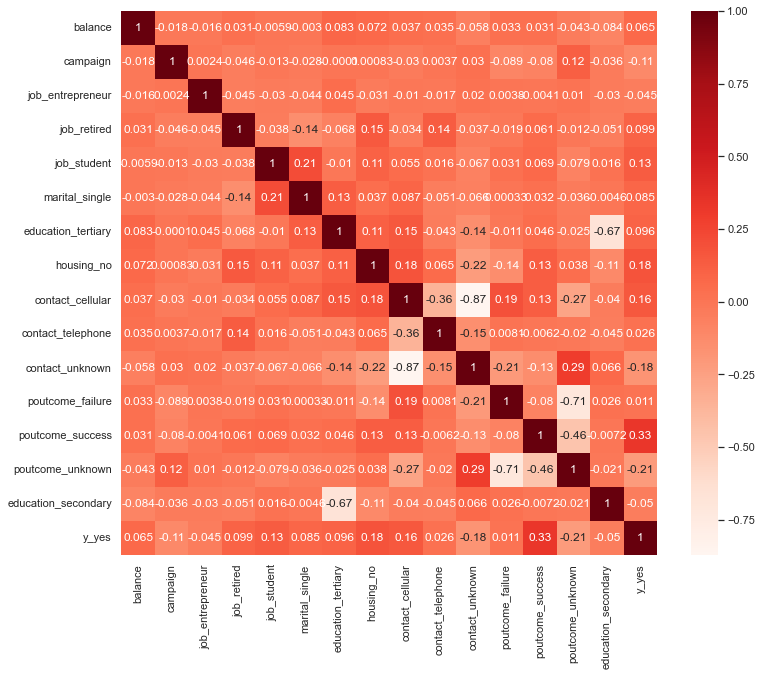

In [22]:
#Using Pearson Correlation
plt.figure(figsize=(12,10))
cor = test.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

In [23]:
#duration needs to be drop when making prediction, X1 is the set of input excluding duration
#X2 is the feature subset from p-value selection. Duration is removed.

X1 = inputs.drop('duration',axis = 'columns')
X2 = inputs[['balance', 'campaign', 'job_entrepreneur', 'job_retired', 'job_student', 'marital_single', 'education_tertiary', 'housing_no', 'contact_cellular', 'contact_telephone', 'contact_unknown', 'poutcome_failure', 'poutcome_success', 'poutcome_unknown']]


In [24]:
# Preparing two set of input features for the predictive models
# Then we will decided which set of features to adopt by evlauating the model performace in next section
print("The number of X1 input features is",len(X1.columns))
print("The number of X2 input features is",len(X2.columns))


The number of X1 input features is 38
The number of X2 input features is 14


# <br>
# Section C: Model Evaluation
3 types of algorithms is introduced. They are trained with both inputs X1 and X2.<br>
Classification report and Confusion Matrix are provided to help identifying the performance.
<br>
Models to be Trained:<br>
1.Logistic Regression <br>
2.Random Forest <br>
3.Naive Bayes <br>
<br>
Sets of Input Features: <br>
X1: Inputs Variables omitted "duration". 38 inputs features in total. <br>
X2: Retained only the variables after doing backward elimination.  14 inputs features in total.<br>
<br>

# Model_1: Logistic Regression

In [25]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

LR = LogisticRegression()
folds = KFold(n_splits = 5, shuffle = True,random_state = 42)

LR_score = cross_val_score(LR,X1,target,cv = folds)
print('The accuracy for Logistic Regression X1 is',np.mean(LR_score))

LR_score = cross_val_score(LR,X2,target,cv = folds)
print('The accuracy for Logistic Regression X2 is',np.mean(LR_score))

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://sciki

The accuracy for Logistic Regression X1 is 0.8035
The accuracy for Logistic Regression X2 is 0.8157499999999999


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://sciki

In [26]:
#Confusion Matirx
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_predict

LR_predicted = cross_val_predict(LR, X1, target, cv=folds)
LR_matrix = confusion_matrix(target, LR_predicted)


LR_predicted_X2 = cross_val_predict(LR, X2, target, cv=folds)
LR_matrix_X2 = confusion_matrix(target, LR_predicted_X2)


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://sciki

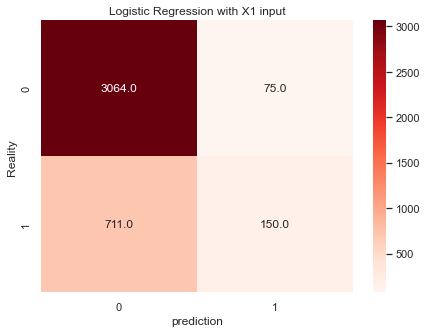

In [27]:
#show the confusion matrix by sns
plt.figure(figsize = (7,5))
sns.heatmap(LR_matrix,annot = True, fmt=".1f", cmap="Reds", cbar=True)
plt.xlabel('prediction')
plt.ylabel('Reality')
plt.title('Logistic Regression with X1 input');

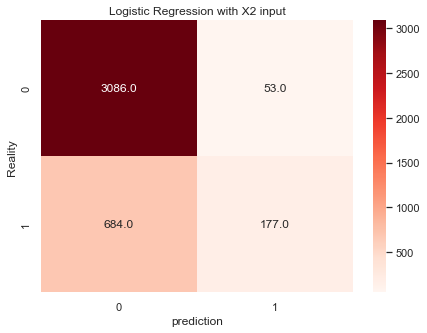

In [28]:
plt.figure(figsize = (7,5))
sns.heatmap(LR_matrix_X2,annot = True, fmt=".1f", cmap="Reds", cbar=True)
plt.xlabel('prediction')
plt.ylabel('Reality')
plt.title('Logistic Regression with X2 input');

In [29]:
from sklearn.metrics import classification_report
print('Classification report for Logistic Regression_X1 features')
print('\n')
print(classification_report(target, LR_predicted))

Classification report for Logistic Regression_X1 features


              precision    recall  f1-score   support

           0       0.81      0.98      0.89      3139
           1       0.67      0.17      0.28       861

    accuracy                           0.80      4000
   macro avg       0.74      0.58      0.58      4000
weighted avg       0.78      0.80      0.75      4000



In [30]:
print('Classification report for Logistic Regression_X2 features')
print('\n')
print(classification_report(target, LR_predicted_X2))

Classification report for Logistic Regression_X2 features


              precision    recall  f1-score   support

           0       0.82      0.98      0.89      3139
           1       0.77      0.21      0.32       861

    accuracy                           0.82      4000
   macro avg       0.79      0.59      0.61      4000
weighted avg       0.81      0.82      0.77      4000



# Model_2: Random Forest

In [31]:
#Creating Random Forest Model
from sklearn.ensemble import RandomForestClassifier
RF = RandomForestClassifier(n_estimators = 60,max_depth = 5,min_samples_leaf=2,random_state = 42)
folds = KFold(n_splits = 5,shuffle=True, random_state=42)

#With X1 dataset
RF_scores = cross_val_score(RF, X1, target, cv=folds)
print("The accuracy for Random Forest model_X1 is",np.mean(RF_scores))

#With X2 dataset
RF_scores_X2 = cross_val_score(RF, X2, target, cv=folds)
print("The accuracy for Random Forest model_X2 is",np.mean(RF_scores_X2))

The accuracy for Random Forest model_X1 is 0.818
The accuracy for Random Forest model_X2 is 0.8154999999999999


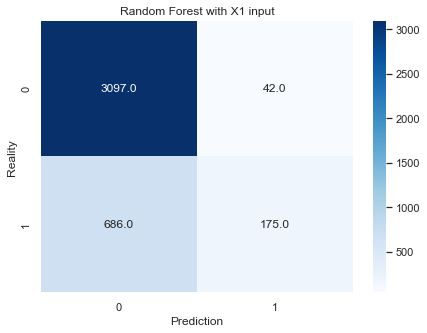

In [32]:
#Confusion Matric

rf_predict = cross_val_predict(RF,X1,target,cv = folds)
rf_matrix = confusion_matrix(target,rf_predict)

#Visualize the confusion matrix with seaborn
plt.figure(figsize = (7,5))
sns.heatmap(rf_matrix,annot = True, fmt=".1f", cmap="Blues", cbar=True)
plt.xlabel('Prediction')
plt.ylabel('Reality')
plt.title('Random Forest with X1 input');

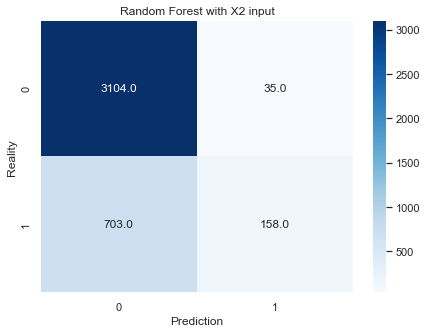

In [33]:
#Confusion Matric
rf_predict_X2 = cross_val_predict(RF,X2,target,cv = folds)
rf_matrix_X2 = confusion_matrix(target,rf_predict_X2)

#Visualize the confusion matrix with seaborn
plt.figure(figsize = (7,5))
sns.heatmap(rf_matrix_X2,annot = True, fmt=".1f", cmap="Blues", cbar=True)
plt.xlabel('Prediction')
plt.ylabel('Reality')
plt.title('Random Forest with X2 input');

In [34]:
print(classification_report(target,rf_predict))

              precision    recall  f1-score   support

           0       0.82      0.99      0.89      3139
           1       0.81      0.20      0.32       861

    accuracy                           0.82      4000
   macro avg       0.81      0.59      0.61      4000
weighted avg       0.82      0.82      0.77      4000



In [35]:
print(classification_report(target,rf_predict_X2))

              precision    recall  f1-score   support

           0       0.82      0.99      0.89      3139
           1       0.82      0.18      0.30       861

    accuracy                           0.82      4000
   macro avg       0.82      0.59      0.60      4000
weighted avg       0.82      0.82      0.77      4000



# Model 3: Naive Bayes

In [36]:
from sklearn.naive_bayes import GaussianNB
NB = GaussianNB()

#With X1 dataset
NB_scores = cross_val_score(NB,X1,target,cv = folds)
print("The accuracy of Naive Bayes_X1 is",np.mean(NB_scores))

#With X2 dataset
NB_scores_X2 = cross_val_score(NB,X2,target,cv = folds)
print("The accuracy of Naive Bayes_X2 is",np.mean(NB_scores_X2))

The accuracy of Naive Bayes_X1 is 0.7462500000000001
The accuracy of Naive Bayes_X2 is 0.788


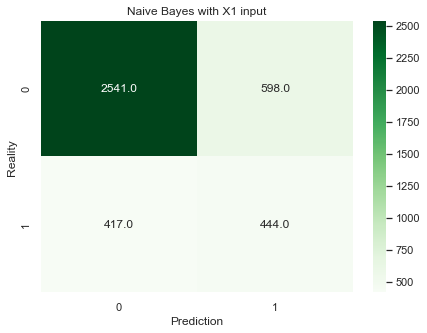

In [37]:
#Confusion Matrix for X1 data
nb_predict = cross_val_predict(NB,X1,target,cv = folds)
nb_matrix = confusion_matrix(target,nb_predict)

#Visualize the confusion matrix with seaborn
plt.figure(figsize = (7,5))
sns.heatmap(nb_matrix,annot = True, fmt=".1f", cmap="Greens", cbar=True)
plt.xlabel('Prediction')
plt.ylabel('Reality')
plt.title('Naive Bayes with X1 input');

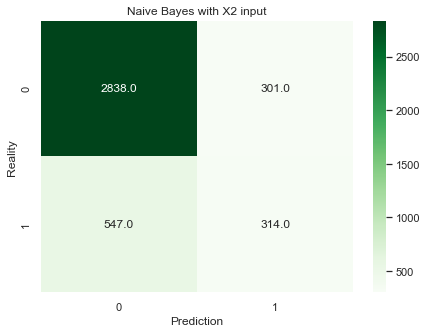

In [38]:
#Confusion Matrix
nb_predict_X2 = cross_val_predict(NB,X2,target,cv = folds)
#print(nb_predict)
nb_matrix_X2 = confusion_matrix(target,nb_predict_X2)
#print(nb_matrix)

#Visualize the confusion matrix with seaborn
plt.figure(figsize = (7,5))
sns.heatmap(nb_matrix_X2,annot = True, fmt=".1f", cmap="Greens", cbar=True)
plt.xlabel('Prediction')
plt.ylabel('Reality')
plt.title('Naive Bayes with X2 input');

In [39]:
print(classification_report(target,nb_predict))

              precision    recall  f1-score   support

           0       0.86      0.81      0.83      3139
           1       0.43      0.52      0.47       861

    accuracy                           0.75      4000
   macro avg       0.64      0.66      0.65      4000
weighted avg       0.77      0.75      0.75      4000



In [40]:
print(classification_report(target,nb_predict_X2))

              precision    recall  f1-score   support

           0       0.84      0.90      0.87      3139
           1       0.51      0.36      0.43       861

    accuracy                           0.79      4000
   macro avg       0.67      0.63      0.65      4000
weighted avg       0.77      0.79      0.77      4000



# <br>
# Section D: Model Optimization
A best performed model is trained againt the whole dataset ready for deployment. <br>
<br>

In [41]:
RF = RandomForestClassifier(n_estimators = 60,max_depth = 5,min_samples_leaf=2,random_state = 42)
RF.fit(X2,target)

RandomForestClassifier(max_depth=5, min_samples_leaf=2, n_estimators=60,
                       random_state=42)